## NLTK란

NLTK 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지\
다양한 기능 및 예제가 있으며 실무연구에도 많이 사용

### NLTK 패키지 주요 기능

- 말뭉치
- 토큰 생성
- 형태소 분석
- 품사 태깅


### 말뭉치

- 말뭉치란 자연어 분석 작업을 위해 만든 샘플 문서의 집합
- NLTK 패키지의 corpus 서브패키지에서 말뭉치 제공
- nltk.download 명령어로 다운로드

In [ ]:
import nltk

nltk.download('book', quiet=True)

from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
carroll_raw = nltk.corpus.gutenberg.raw('carroll-alice.txt')
print(carroll_raw[:100])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was


### 토큰생성

- 토큰이랑 자연어 문서를 분석하기 위해 긴 문자열을 분석하여 작은 단위로 나눈 것
- 토큰생성: 문자열을 토큰으로 나누는 작업

In [ ]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(carroll_raw[:1000])[1])

Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'


In [ ]:
from nltk.tokenize import word_tokenize
print(word_tokenize(carroll_raw[:100]))

['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was']


In [ ]:
from nltk.tokenize import RegexpTokenizer
reg_token = RegexpTokenizer('[\w]+')
reg_token.tokenize(carroll_raw[:100])

['Alice',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 'CHAPTER',
 'I',
 'Down',
 'the',
 'Rabbit',
 'Hole',
 'Alice',
 'was']

### 형태소분석

- 형태소란 언어학에서 일정한 의미가 있는 가장 작은 말의 단위
- 형태소 분석이란 단어로 부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고 형태소를 찾아내는 작업

#### 어간추출

- 어간추출은 변화된 단어의 접미사나 어미를 제거하여 형태소의 기본형을 찾는 방법

#### 원형복원

- 원형복원은 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업

In [ ]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['working', 'works', 'worded']

for temp in words:
  print(st1.stem(temp))

work
work
word


In [ ]:
for temp in words:
  print(st2.stem(temp))

work
work
word


In [ ]:
from nltk.stem import WordNetLemmatizer

words = ['fly', 'flies', 'flying']
lm = WordNetLemmatizer()

for temp in words:
  print(lm.lemmatize(temp, pos='v'))

fly
fly
fly


## 품사

품사(POS, part-of-speech)는 낱말을 문법적인 기능이나 형태, 뜻에 따라 구분한 것\
품사의 구분은 언어, 학자마다 다름\
NLTK에서는 펜 트리뱅크 태그세트 사용

- NNP: 단수 고유명사
- VB: 동사
- VBP: 동사 현재형
- TO: to 전치사
- NN: 명사(단수형 혹은 집합형)
- DT: 관형사

In [ ]:
from nltk.tag import pos_tag

sentence = "Alice's Adventures in Wonderland by Lewis Carroll 1865"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Alice', 'NNP'),
 ("'s", 'POS'),
 ('Adventures', 'NNS'),
 ('in', 'IN'),
 ('Wonderland', 'NNP'),
 ('by', 'IN'),
 ('Lewis', 'NNP'),
 ('Carroll', 'NNP'),
 ('1865', 'CD')]

In [ ]:
noun_list = [t[0] for t in tagged_list if t[1] == 'NNP']
noun_list

['Alice', 'Wonderland', 'Lewis', 'Carroll']

## Text 클래스

- 문서 분석에 유용한 여러가지 메서드 제공

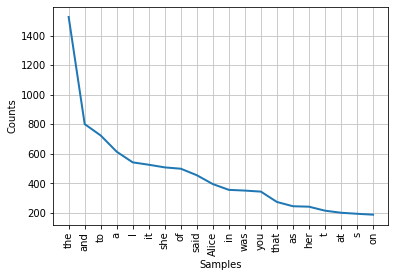

In [ ]:
from nltk import Text

text = Text(reg_token.tokenize(carroll_raw))
text.plot(20)

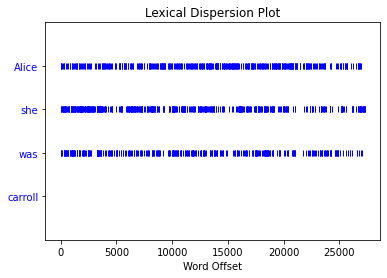

In [ ]:
text.dispersion_plot(['Alice', 'she', 'was', 'carroll'])

In [ ]:
text.concordance('Alice')

Displaying 25 of 398 matches:
                                     Alice s Adventures in Wonderland by Lewis 
                                     Alice was beginning to get very tired of s
nd what is the use of a book thought Alice without pictures or conversation So 
g so VERY remarkable in that nor did Alice think it so VERY much out of the way
and looked at it and then hurried on Alice started to her feet for it flashed a
he hedge In another moment down went Alice after it never once considering how 
ipped suddenly down so suddenly that Alice had not a moment to think about stop
rds as she fell past it Well thought Alice to herself after such a fall as this
usand miles down I think for you see Alice had learnt several things of this so
at Latitude or Longitude I ve got to Alice had no idea what Latitude was or Lon
down There was nothing else to do so Alice soon began talking again Dinah ll mi
t do cats eat bats I wonder And here Alice began to get rather sleepy and went 
and dry le

In [ ]:
text.similar('Alice')

she it her they he this herself them all speak get and say begin do be
that see one go


In [ ]:
text.common_contexts(['Alice', 'she'])

that_had when_had and_s but_had so_went and_was and_could and_thought
and_heard and_looked as_could that_could know_had moment_appeared
so_began time_had moment_felt


## FreqDist

- 문서에 사용된 단어의 사용 빈도 정보

In [ ]:
Fd = text.vocab()

In [ ]:
from nltk import FreqDist

stop_words = ['Mr.', 'Mrs.', 'Miss', 'Mr', 'Mrs', 'Dear']
carroll_tokens = pos_tag(reg_token.tokenize(carroll_raw))
name_list = [t[0] for t in carroll_tokens if t[1] == 'NNP' and t[0] not in stop_words]

In [ ]:
fd_names = FreqDist(name_list)
fd_names.N()

1981

In [ ]:
fd_names['Alice']

391

In [ ]:
fd_names.freq('Alice')

0.19737506309944472

In [ ]:
fd_names.most_common(5)

[('Alice', 391), ('Queen', 73), ('King', 60), ('Turtle', 58), ('Mock', 56)]